# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
 

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Understand The Data

In [3]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0           0.0            1.0          Yes   
1  51676  Female  61.0           0.0            0.0          Yes   
2  31112    Male  80.0           0.0            1.0          Yes   
3  60182  Female  49.0           0.0            0.0          Yes   
4   1665  Female  79.0           1.0            0.0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5107 non-null   object 
 2   age                5105 non-null   float64
 3   hypertension       5095 non-null   float64
 4   heart_disease      5089 non-null   float64
 5   ever_married       5084 non-null   object 
 6   work_type          5073 non-null   object 
 7   Residence_type     5084 non-null   object 
 8   avg_glucose_level  5098 non-null   float64
 9   bmi                4901 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 479.2+ KB


In [5]:
round(df.describe(include='all'),3)

id  gender       age  hypertension  heart_disease ever_married  \
count    5110.000    5107  5105.000      5095.000       5089.000         5084   
unique        NaN       3       NaN           NaN            NaN            2   
top           NaN  Female       NaN           NaN            NaN          Yes   
freq          NaN    2992       NaN           NaN            NaN         3341   
mean    36517.829     NaN    43.224         0.097          0.054          NaN   
std     21161.722     NaN    22.617         0.296          0.226          NaN   
min        67.000     NaN     0.080         0.000          0.000          NaN   
25%     17741.250     NaN    25.000         0.000          0.000          NaN   
50%     36932.000     NaN    45.000         0.000          0.000          NaN   
75%     54682.000     NaN    61.000         0.000          0.000          NaN   
max     72940.000     NaN    82.000         1.000          1.000          NaN   

       work_type Residence_type  avg_glucose_level       bmi smoking_status  \
count       5073           5084           5098.000  4901.000           5109   
unique         5              2                NaN       NaN              4   
top      Private          Urban                NaN       NaN   never smoked   
freq        2907           2580                NaN       NaN           1892   
mean         NaN            NaN            106.176    28.898            NaN   
std          NaN            NaN             45.294     7.858            NaN   
min          NaN            NaN             55.120    10.300            NaN   
25%          NaN            NaN             77.282    23.500            NaN   
50%          NaN            NaN             91.895    28.100            NaN   
75%          NaN            NaN            114.090    33.100            NaN   
max          NaN            NaN            271.740    97.600            NaN   

          stroke  
count   5110.000  
unique       NaN  
top          NaN  
freq         NaN  
mean       0.049  
std        0.215  
min        0.000  
25%        0.000  
50%        0.000  
75%        0.000  
max        1.000

In [6]:
df.shape

(5110, 12)

# Data Cleaning

In [7]:
#Removing unneccesary attribute id
df =df.drop('id', axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5107 non-null   object 
 1   age                5105 non-null   float64
 2   hypertension       5095 non-null   float64
 3   heart_disease      5089 non-null   float64
 4   ever_married       5084 non-null   object 
 5   work_type          5073 non-null   object 
 6   Residence_type     5084 non-null   object 
 7   avg_glucose_level  5098 non-null   float64
 8   bmi                4901 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 439.3+ KB


In [9]:
df.isna().sum()

gender                 3
age                    5
hypertension          15
heart_disease         21
ever_married          26
work_type             37
Residence_type        26
avg_glucose_level     12
bmi                  209
smoking_status         1
stroke                 0
dtype: int64

In [10]:
#Eliminating the null value rows
df.dropna(inplace =True,axis=0)

In [11]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df['gender'].value_counts()

Female    2803
Male      1959
Other        1
Name: gender, dtype: int64

In [13]:
filtered_rows = df[(df['gender'] != 'Male') & (df['gender'] != 'Female')]
df= df.drop(filtered_rows.index)

In [14]:
num_cols = ['age','bmi','avg_glucose_level']
categorical_cols = ['gender','hypertension','heart_disease','ever_married', 'work_type', 'Residence_type','smoking_status','stroke']

# Data Visualization

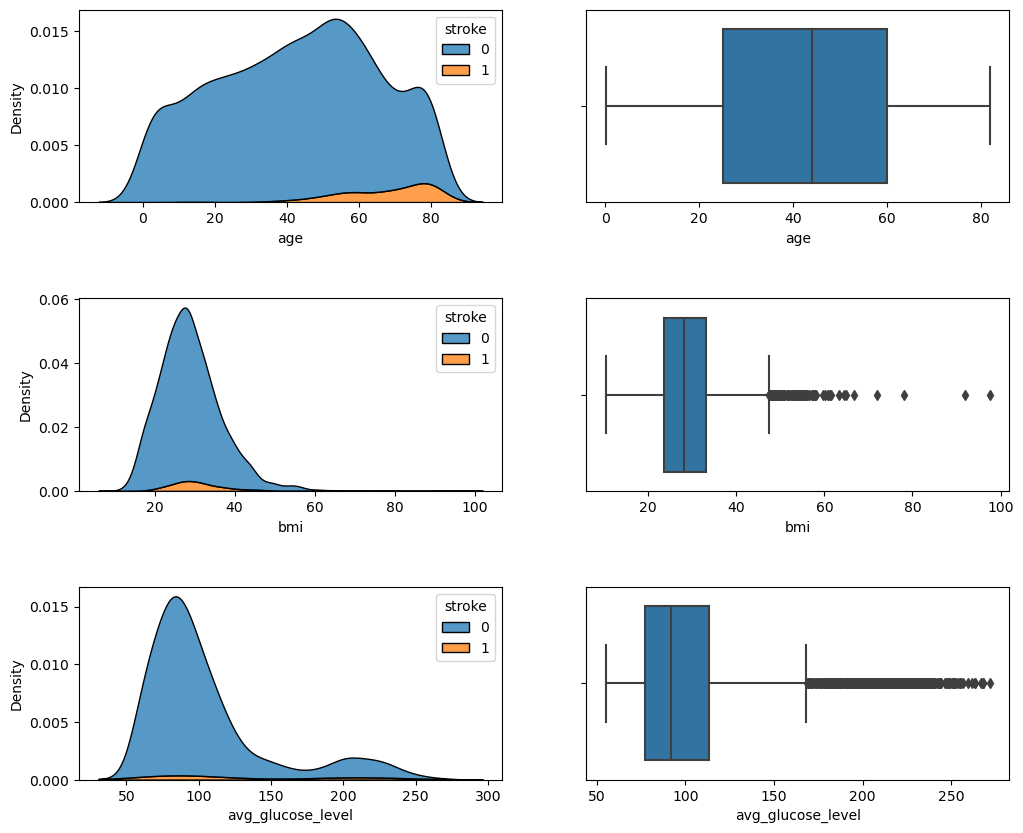

In [15]:
i=0
fig, ax= plt.subplots(3,2, figsize=(12,10))
plt.subplots_adjust(hspace=0.5)
for col in num_cols:
    sns.kdeplot(x=col, hue='stroke', data=df, multiple='stack', ax=ax[i,0])
    sns.boxplot(x=col, data=df, ax=ax[i,1])
    i += 1
plt.show()

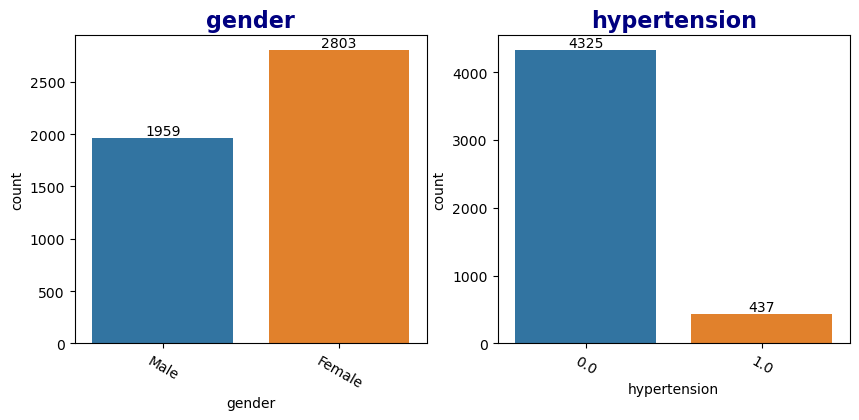

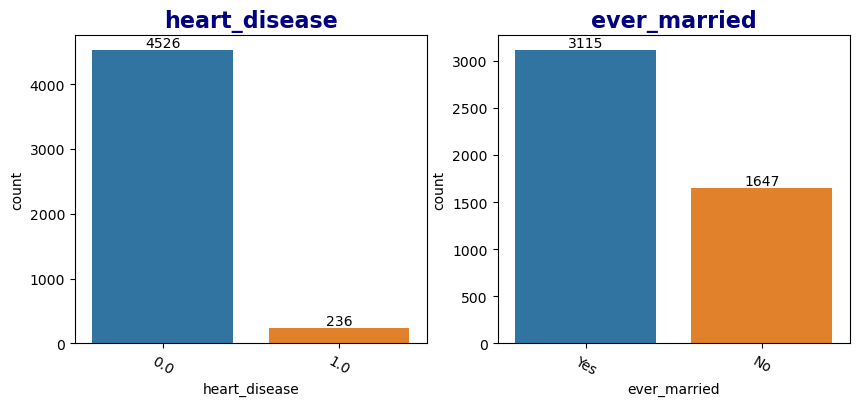

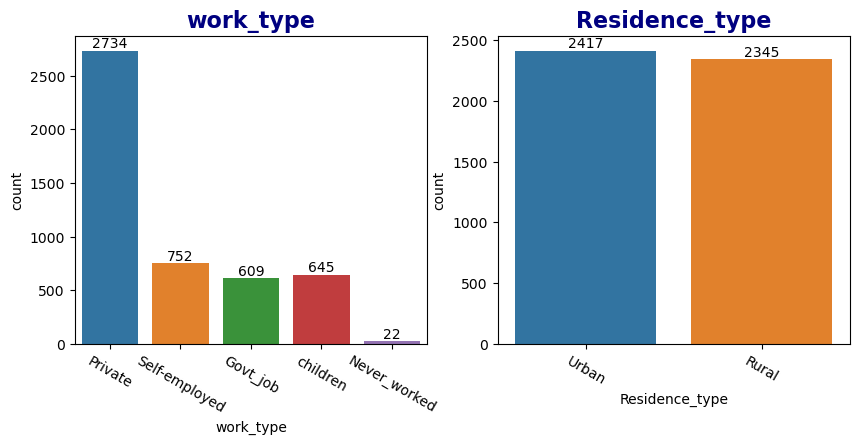

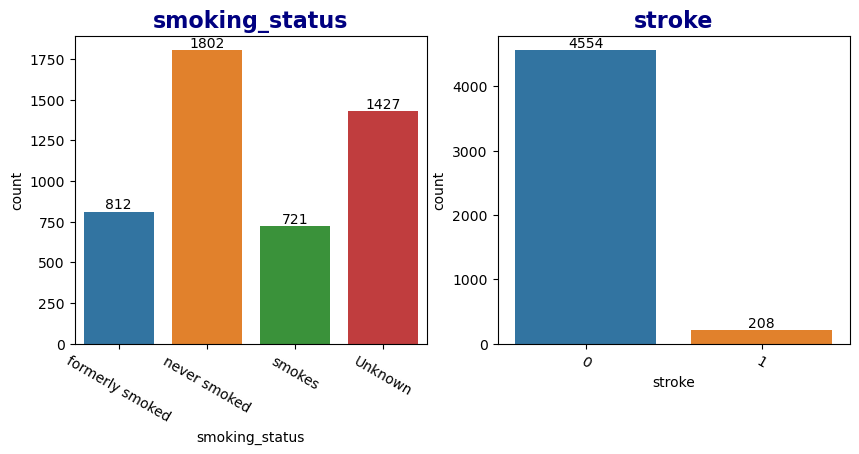

In [16]:
i=0
while i<8 :
    
    # Left Plot
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_cols[i], size=16, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_cols[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=330)
   
    i+=1
    
    # Right Plot
    plt.subplot(1, 2, 2)
    plt.title(categorical_cols[i], size=16, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_cols[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=330)
    i+=1
    plt.show()

# Data Preparation for Modelling

In [17]:
for col in categorical_cols :
    print('Column: ',col)
    for index, unique in enumerate(df[col].unique()):
        print(unique,' : ', index)
    print('*'*50)

Column:  gender
Male  :  0
Female  :  1
**************************************************
Column:  hypertension
0.0  :  0
1.0  :  1
**************************************************
Column:  heart_disease
1.0  :  0
0.0  :  1
**************************************************
Column:  ever_married
Yes  :  0
No  :  1
**************************************************
Column:  work_type
Private  :  0
Self-employed  :  1
Govt_job  :  2
children  :  3
Never_worked  :  4
**************************************************
Column:  Residence_type
Urban  :  0
Rural  :  1
**************************************************
Column:  smoking_status
formerly smoked  :  0
never smoked  :  1
smokes  :  2
Unknown  :  3
**************************************************
Column:  stroke
1  :  0
0  :  1
**************************************************


In [18]:
#Converting values from object type to integer
df['gender']=df['gender'].apply(lambda x: 1 if x =='Male' else 0)
df['ever_married']=df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Residence_type']=df['Residence_type'].apply(lambda x: 1 if x =='Urban' else 0)

In [19]:
df['gender'].value_counts()

0    2803
1    1959
Name: gender, dtype: int64

In [20]:
df['ever_married'].value_counts()

1    3115
0    1647
Name: ever_married, dtype: int64

In [21]:
df['Residence_type'].value_counts()

1    2417
0    2345
Name: Residence_type, dtype: int64

In [22]:
df = pd.concat([df.drop('smoking_status', axis=1), pd.get_dummies(df['smoking_status']).add_prefix('smoking_status_')], axis=1 )
df = pd.concat([df.drop('work_type', axis=1), pd.get_dummies(df['work_type']).add_prefix('work_type_')], axis=1)

In [23]:
df.head()

gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0       1  67.0           0.0            1.0             1               1   
2       1  80.0           0.0            1.0             1               0   
3       0  49.0           0.0            0.0             1               1   
4       0  79.0           1.0            0.0             1               0   
5       1  81.0           0.0            0.0             1               1   

   avg_glucose_level   bmi  stroke  smoking_status_Unknown  \
0             228.69  36.6       1                       0   
2             105.92  32.5       1                       0   
3             171.23  34.4       1                       0   
4             174.12  24.0       1                       0   
5             186.21  29.0       1                       0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
2                               0                            1   
3                               0                            0   
4                               0                            1   
5                               1                            0   

   smoking_status_smokes  work_type_Govt_job  work_type_Never_worked  \
0                      0                   0                       0   
2                      0                   0                       0   
3                      1                   0                       0   
4                      0                   0                       0   
5                      0                   0                       0   

   work_type_Private  work_type_Self-employed  work_type_children  
0                  1                        0                   0  
2                  1                        0                   0  
3                  1                        0                   0  
4                  0                        1                   0  
5                  1                        0                   0

# Model Preparation

In [24]:
X_temp = df.drop('stroke', axis=1)
y = df['stroke']

In [25]:
X_temp

gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0          1  67.0           0.0            1.0             1               1   
2          1  80.0           0.0            1.0             1               0   
3          0  49.0           0.0            0.0             1               1   
4          0  79.0           1.0            0.0             1               0   
5          1  81.0           0.0            0.0             1               1   
...      ...   ...           ...            ...           ...             ...   
5104       0  13.0           0.0            0.0             0               0   
5106       0  81.0           0.0            0.0             1               1   
5107       0  35.0           0.0            0.0             1               0   
5108       1  51.0           0.0            0.0             1               0   
5109       0  44.0           0.0            0.0             1               1   

      avg_glucose_level   bmi  smoking_status_Unknown  \
0                228.69  36.6                       0   
2                105.92  32.5                       0   
3                171.23  34.4                       0   
4                174.12  24.0                       0   
5                186.21  29.0                       0   
...                 ...   ...                     ...   
5104             103.08  18.6                       1   
5106             125.20  40.0                       0   
5107              82.99  30.6                       0   
5108             166.29  25.6                       0   
5109              85.28  26.2                       1   

      smoking_status_formerly smoked  smoking_status_never smoked  \
0                                  1                            0   
2                                  0                            1   
3                                  0                            0   
4                                  0                            1   
5                                  1                            0   
...                              ...                          ...   
5104                               0                            0   
5106                               0                            1   
5107                               0                            1   
5108                               1                            0   
5109                               0                            0   

      smoking_status_smokes  work_type_Govt_job  work_type_Never_worked  \
0                         0                   0                       0   
2                         0                   0                       0   
3                         1                   0                       0   
4                         0                   0                       0   
5                         0                   0                       0   
...                     ...                 ...                     ...   
5104                      0                   0                       0   
5106                      0                   0                       0   
5107                      0                   0                       0   
5108                      0                   0                       0   
5109                      0                   1                       0   

      work_type_Private  work_type_Self-employed  work_type_children  
0                     1                        0                   0  
2                     1                        0                   0  
3                     1                        0                   0  
4                     0                        1                   0  
5                     1                        0                   0  
...                 ...                      ...                 ...  
5104                  0                        0                   1  
5106                  0                        1  

In [26]:
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4762, dtype: int64

In [27]:
#Normalization
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler,columns=X_temp.columns)
X.describe()

gender          age  hypertension  heart_disease  ever_married  \
count  4762.000000  4762.000000   4762.000000    4762.000000   4762.000000   
mean      0.411382     0.522968      0.091768       0.049559      0.654137   
std       0.492136     0.274771      0.288729       0.217055      0.475699   
min       0.000000     0.000000      0.000000       0.000000      0.000000   
25%       0.000000     0.304199      0.000000       0.000000      0.000000   
50%       0.000000     0.536133      0.000000       0.000000      1.000000   
75%       1.000000     0.731445      0.000000       0.000000      1.000000   
max       1.000000     1.000000      1.000000       1.000000      1.000000   

       Residence_type  avg_glucose_level          bmi  smoking_status_Unknown  \
count     4762.000000        4762.000000  4762.000000             4762.000000   
mean         0.507560           0.231847     0.213289                0.299664   
std          0.499995           0.205049     0.090019                0.458159   
min          0.000000           0.000000     0.000000                0.000000   
25%          0.000000           0.101376     0.151489                0.000000   
50%          1.000000           0.168775     0.203895                0.000000   
75%          1.000000           0.270104     0.261168                1.000000   
max          1.000000           1.000000     1.000000                1.000000   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                     4762.000000                  4762.000000   
mean                         0.170517                     0.378412   
std                          0.376125                     0.485042   
min                          0.000000                     0.000000   
25%                          0.000000                     0.000000   
50%                          0.000000                     0.000000   
75%                          0.000000                     1.000000   
max                          1.000000                     1.000000   

       smoking_status_smokes  work_type_Govt_job  work_type_Never_worked  \
count            4762.000000         4762.000000              4762.00000   
mean                0.151407            0.127887                 0.00462   
std                 0.358483            0.334000                 0.06782   
min                 0.000000            0.000000                 0.00000   
25%                 0.000000            0.000000                 0.00000   
50%                 0.000000            0.000000                 0.00000   
75%                 0.000000            0.000000                 0.00000   
max                 1.000000            1.000000                 1.00000   

       work_type_Private  work_type_Self-employed  work_type_children  
count        4762.000000              4762.000000         4762.000000  
mean            0.574129                 0.157917            0.135447  
std             0.494526                 0.364701            0.342237  
min             0.000000                 0.000000            0.000000  
25%             0.000000                 0.000000            0.000000  
50%             1.000000                 0.000000            0.000000  
75%             1.000000                 0.000000            0.000000  
max             1.000000                 1.000000            1.000000

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4762 entries, 0 to 4761
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4762 non-null   float64
 1   age                             4762 non-null   float64
 2   hypertension                    4762 non-null   float64
 3   heart_disease                   4762 non-null   float64
 4   ever_married                    4762 non-null   float64
 5   Residence_type                  4762 non-null   float64
 6   avg_glucose_level               4762 non-null   float64
 7   bmi                             4762 non-null   float64
 8   smoking_status_Unknown          4762 non-null   float64
 9   smoking_status_formerly smoked  4762 non-null   float64
 10  smoking_status_never smoked     4762 non-null   float64
 11  smoking_status_smokes           4762 non-null   float64
 12  work_type_Govt_job              47

In [29]:
#Splitting data
train_X, test_X, train_y,test_y = train_test_split(X,y, test_size = 0.3)


In [30]:
#Logistic Regression

In [31]:
log_reg=LogisticRegression()
log_reg.fit(train_X,train_y)

LogisticRegression()

In [32]:
predict_y = log_reg.predict(test_X)
predict_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
log_reg.score(test_X, test_y)

0.9545136459062281

In [34]:
cr = metrics.classification_report(test_y, predict_y)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1364
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1429
   macro avg       0.48      0.50      0.49      1429
weighted avg       0.91      0.95      0.93      1429



C:\Users\91888\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91888\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91888\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
lg_accuracy = accuracy_score(test_y, predict_y)
lg_accuracy*100

95.45136459062282

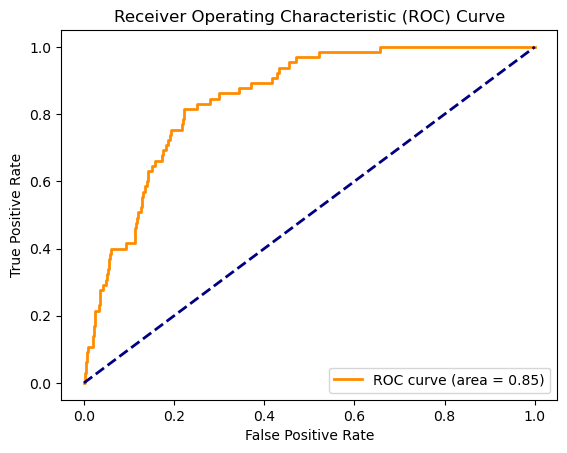

In [36]:
y_score = log_reg.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Random Forest

In [37]:
randomforest= RandomForestClassifier(criterion="entropy")
randomforest.fit(train_X, train_y)

RandomForestClassifier(criterion='entropy')

In [38]:
rf_y_pred= randomforest.predict(test_X)
rf_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
rf_cr = metrics.classification_report(test_y, rf_y_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1364
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1429
   macro avg       0.48      0.50      0.49      1429
weighted avg       0.91      0.95      0.93      1429



In [40]:
rf_accuracy = accuracy_score(test_y, rf_y_pred)
rf_accuracy*100

95.31140657802659

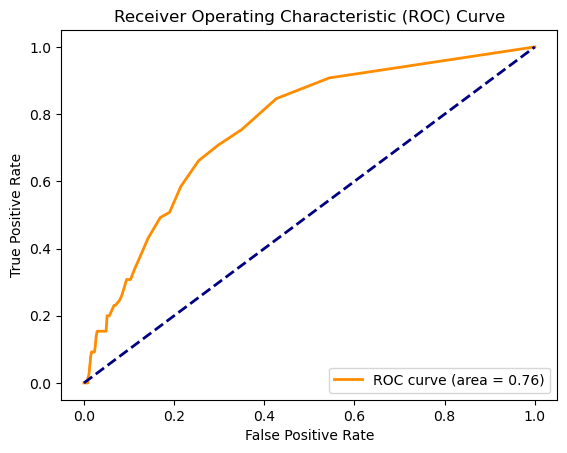

In [41]:
y_score = randomforest.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [42]:
KNN_classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean')  
KNN_classifier.fit(train_X,train_y)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [43]:
knn_y_pred= KNN_classifier.predict(test_X)
knn_y_pred

C:\Users\91888\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
knn_accuracy = accuracy_score(test_y, knn_y_pred)
knn_accuracy*100

95.3813855843247

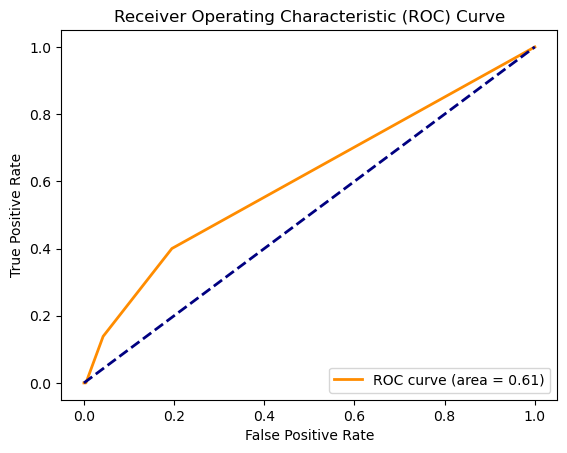

In [45]:
y_score = KNN_classifier.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [46]:
from sklearn.svm import SVC

In [47]:
svm = SVC(kernel="rbf", gamma=0.9, C=1.9,probability=True)
svm.fit(train_X, train_y)

SVC(C=1.9, gamma=0.9, probability=True)

In [48]:
svm_pred = svm.predict(test_X)
svm_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
svm_accuracy = accuracy_score(test_y, svm_pred)
svm_accuracy*100

95.45136459062282

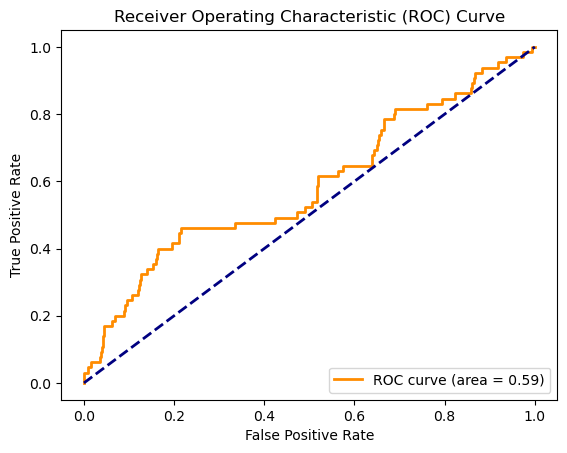

In [50]:
y_score = svm.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz


In [52]:
dtclassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtclassifier.fit(train_X,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [53]:
dt_pred = dtclassifier.predict(test_X)
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
dtclassfier_accuracy = accuracy_score(test_y,dt_pred)
dtclassfier_accuracy*100

91.74247725682295

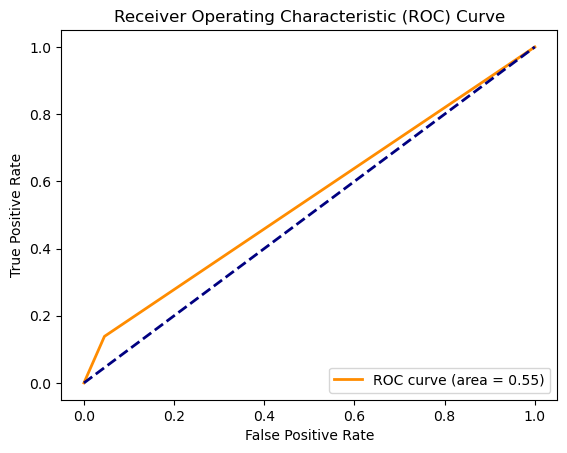

In [55]:
y_score = dtclassifier.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [56]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [57]:
from sklearn.naive_bayes import GaussianNB 

In [58]:
navibayes = GaussianNB()
navibayes.fit(train_X,train_y)

GaussianNB()

In [59]:
n_pred = navibayes.predict(test_X)
n_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
n_accuracy = accuracy_score(test_y,n_pred)
n_accuracy*100

36.24912526242127

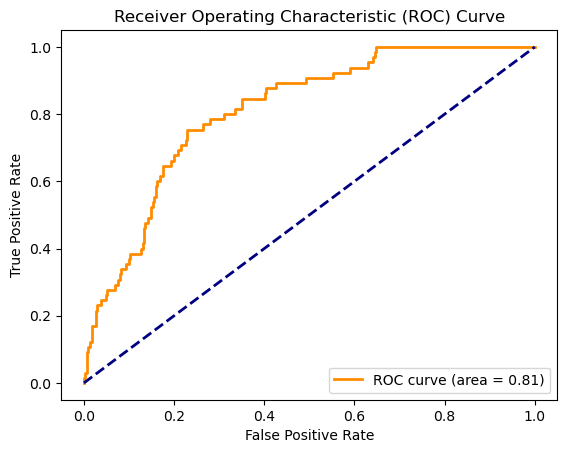

In [61]:
y_score = navibayes.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [62]:
#Highest Accuracy
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(random_state=1)
ABC.fit(train_X,train_y)
#model.score(test_X,test_y)
pred=ABC.predict(test_X)
accuracy_score(test_y,pred)*100

95.31140657802659

In [63]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
BC = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
BC.fit(train_X, train_y)
pred=BC.predict(test_X)
accuracy_score(test_y,pred)*100

94.6815955213436

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
GBD= GradientBoostingClassifier(learning_rate=0.0001,random_state=1)
GBD.fit(train_X, train_y)
pred=GBD.predict(test_X)
accuracy_score(test_y,pred)*100

95.45136459062282

In [65]:
from xgboost import XGBClassifier
model=XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(train_X, train_y)
model.score(test_X,test_y)*100

95.45136459062282

In [66]:
data = {
    'gender': [0],
    'age': [49.0],
    'hypertension': [1.0],
    'heart_disease':[0.0],
    'ever_married':[1],
    'Residence_type':[0],
    'avg_glucose_level':[220.34],
    'bmi': [27.4],
    'smoking_status_Unknown':[0],
    'smoking_status_formerly smoked':[0],
    'smoking_status_never smoked':[1],
    'smoking_status_smokes':[0],
    'work_type_Govt_job':[0],
    'work_type_Never_worked': [0],
    'work_type_Private':[1],
    'work_type_Self-employed':[0],
    'work_type_children':[0] 
}
df2 = pd.DataFrame(data)
predicted = svm.predict(df2)
print(predicted)

[0]
